In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


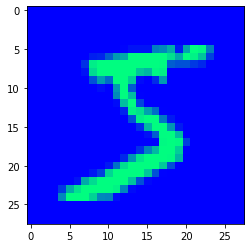

In [5]:
plt.imshow(X_train[0],cmap = 'winter')

In [6]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
def create_model(input_shape,n_classes):
  model = Sequential()

  model.add(Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  return model

In [10]:
input_shape = X_train.shape
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (60000, 28, 28, 32)       320       
_________________________________________________________________
conv2d_1 (Conv2D)            (60000, 26, 26, 32)       9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (60000, 13, 13, 32)       0         
_________________________________________________________________
dropout (Dropout)            (60000, 13, 13, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (60000, 13, 13, 64)       18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (60000, 11, 11, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (60000, 5, 5, 64)         0

In [11]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
model.fit(X_train,y_train,epochs = 5,validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 15s 4ms/step - loss: 0.5487 - accuracy: 0.8143 - val_loss: 0.0427 - val_accuracy: 0.9865
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0819 - accuracy: 0.9761 - val_loss: 0.0440 - val_accuracy: 0.9877
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0608 - accuracy: 0.9825 - val_loss: 0.0313 - val_accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0490 - accuracy: 0.9867 - val_loss: 0.0272 - val_accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0402 - accuracy: 0.9889 - val_loss: 0.0249 - val_accuracy: 0.9929


In [13]:
import cv2
import numpy as np

In [25]:
from google.colab import files
files.upload()

Saving seven.png to seven (1).png


{'seven.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xd2\x00\x00\x05\xc8\x08\x06\x00\x00\x00\xbe\xbb<Z\x00\x00\n\xa9iCCPICC Profile\x00\x00H\x89\x95\x96\x07TS\xd9\x16\x86\xcf\xbd\xe9\x8d\x16\xba\x94\xd0;R\xa4K\t=\xf4\xdel\x84$@(!&\x04\x15\x1b*\x83#0\xa2\x88\x88\x802\xa0C\x11\x05\x1bE\x06\x1b\x16T\x10\x05\x15\xec\x032(\xa8\xe3`\xc1\x86\x9aw\x91G\x98yo\xbd\xf7\xd6\xfb\xd7:\xf7~k\xdf}\xf6\xd9\xe7\xdc}\xd6\xda\x00\x90o3\xf9\xfc4X\x06\x80t^\xa6 \xcc\xc7\x9d\x16\x13\x1bG\xc3\x8d\x02\x08P\x80< \x00\n\x93%\xe4\xd3CB\x02\x00\xa2\xb9\xf7\xdf\xf5~\x10\xf1Ft\xcbl&\xd6\xbf\x7f\xff\xaf\x92es\x84,\x00\xa0\x10\x84\x13\xd8BV:\xc2\'\x91\xd1\xc9\xe2\x0b2\x01@\xf1\x11\xbb\xce\xaaL\xfe\x0c\x97 ,/@\x12D\xb8~\x86\x93f\xb9s\x86\x13f\xf9\xe6w\x9f\x880\x0f\x84\x7f\x07\x00Of2\x05I\x00\x90&\x11;-\x8b\x95\x84\xc4!#\xbb\x05\x16<6\x97\x87\xb0\x1b\xc2.\xacd&\x1b\xe1\x1c\x84M\xd3\xd33f\xf80\xc2\x86\t\x7f\x89\x93\xf4\xb7\x98\t\x92\x98Lf\x92\x84g\xf7\xf2]xO\xae\x90\x9f\xc6\\\xf3\x7f\x1e\xc7\xffVz\x9ahn\r\x1dd

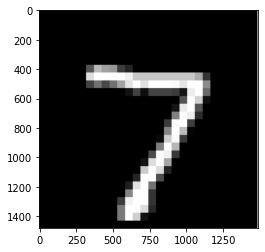

In [27]:
img = cv2.imread('seven.png')
plt.imshow(img)

In [28]:
img = img[:,:,0]

In [29]:
img = cv2.resize(img,(28,28))

In [30]:
img = np.reshape(img,[1,28,28,1])

In [31]:
value = np.argmax(model.predict(img))
print(value)

7
